In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
np.__version__

'1.15.1'

## The Logistic Function

The [logistic function](https://en.wikipedia.org/wiki/Logistic_regression#Definition_of_the_logistic_function) is an _s-curve_ that maps the entire domain of $x$ into the range $(0,1)$.  

$$p(X) = \frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}} = \frac{1}{1+e^{-(\beta_0+\beta_1X)}}$$

This is closely related to the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function):

$$ S(x) = \frac{e^x}{1+e^{-x}} = \frac{1}{1+e^{-x}}$$

The sigmoid is a special case of the logistic function.

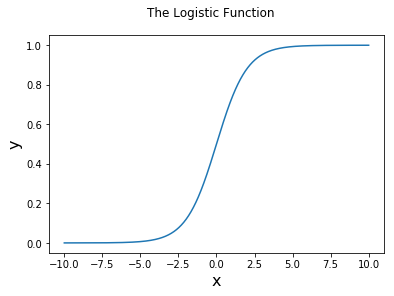

In [2]:
xs = np.linspace(-10, 10, 1000)
ys = np.exp(xs)/(1 + np.exp(xs))

plt.plot(xs,ys)
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.suptitle('The Logistic Function')

plt.show()

https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac
    
and 

https://github.com/martinpella/logistic-reg/blob/master/logistic_reg.ipynb

In [3]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

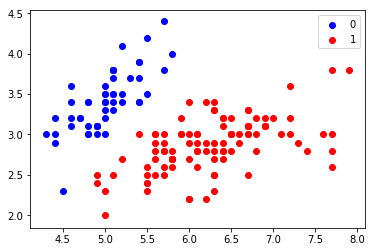

In [6]:
#plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

In [8]:
theta = np.zeros(X.shape[1])

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
z = np.dot(X, theta)
h = sigmoid(z)

In [18]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [19]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

In [20]:
def fit(self, X, y):
    if fit_intercept:
        X = add_intercept(X)
        
    # weights initialization
    theta = np.zeros(X.shape[1])
        
    for indx in range(num_iter):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= learning_rate * gradient
            
        z = np.dot(X, self.theta)
        h = sigmoid(z)
        loss = loss(h, y)
                
        if(indx % 10000 == 0):
            print('loss: '+str(loss)+' \t')

In [21]:
def predict_prob(X):
    if fit_intercept:
        X = add_intercept(X)
    
    return sigmoid(np.dot(X, self.theta))
    
def predict(self, X):
    return predict_prob(X).round()